In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cvx
%matplotlib inline

In [44]:
R = np.array([0.01, 0.02])
C = np.array([[0.02, 0. ],
              [0.  , 0.04]])

In [45]:
def calc_portfolio_exp(weights, R, C):
    
    return_exp = np.dot(weights.T,R)
    vol_exp    = np.dot(weights.T, C).dot(weights)
    
    return return_exp, vol_exp

In [46]:
possible_weights = [np.array([1.0, 1.0-x]) for x in np.linspace(0.0, 1.0, 11)] 

In [47]:
portfolios = np.array([calc_portfolio_exp(weights, R,C) for weights in possible_weights])

In [48]:
portfolios

array([[0.03  , 0.06  ],
       [0.028 , 0.0524],
       [0.026 , 0.0456],
       [0.024 , 0.0396],
       [0.022 , 0.0344],
       [0.02  , 0.03  ],
       [0.018 , 0.0264],
       [0.016 , 0.0236],
       [0.014 , 0.0216],
       [0.012 , 0.0204],
       [0.01  , 0.02  ]])

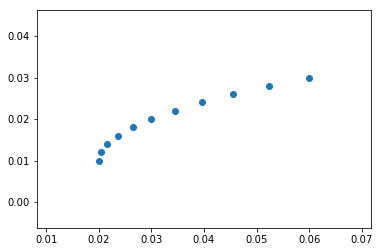

In [51]:
f,a = plt.subplots()
a.scatter(portfolios[:,1], portfolios[:,0])

In [50]:
def optimize(R, C, risk_aversion=0.5):
    
    n_assets = len(R)
    
    weights = cvx.Variable(n_assets)
    
    return_exp = weights.T * R
    vol_exp    = cvx.quad_form(weights, C)

In [15]:
weights = cvx.Variable(len(R))

In [16]:
return_exp = weights.T * R
vol_exp    = cvx.quad_form(weights, C)

In [7]:
risk_aversion = 0.5

In [8]:
utility = return_exp - risk_aversion * vol_exp

In [10]:
objective = cvx.Maximize(utility)

In [11]:
constraints = [
                cvx.sum(weights) == 1,  # fully-invested
                weights >= 0,           # long-only
              ]

In [12]:
problem = cvx.Problem(objective, constraints)
problem.solve()

0.0012499999924708474

In [13]:
weights.value

array([0.10000258, 0.15000145, 0.19999992, 0.24999866, 0.29999739])